<a href="https://colab.research.google.com/github/CactusStz/Analisis-Data/blob/main/analisa_nutrisi_makanan_yang_dibutuhkan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing data and checking data

Import data

https://www.mayoclinichealthsystem.org/hometown-health/speaking-of-health/are-you-getting-too-much-protein#:~:text=Anywhere%20from%2010%25%20to%2035,%2C%20or%2050–175%20grams.

https://www.kaggle.com/code/arthurtok/super-sized-we-mcdonald-s-nutritional-metrics

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import plotly.graph_objs as go
import itertools

warnings.filterwarnings('ignore')

data = pd.read_csv("food_menu.csv")
data.head()

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,...,31,10,4,17,3,17,10,0,25,15
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70,8.0,12,3.0,15,0.0,...,30,10,4,17,3,18,6,0,25,8
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,200,23.0,35,8.0,42,0.0,...,29,10,4,17,2,14,8,0,25,10
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,250,28.0,43,10.0,52,0.0,...,30,10,4,17,2,21,15,0,30,15
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,210,23.0,35,8.0,42,0.0,...,30,10,4,17,2,21,6,0,25,10


Mengecek data apakah sudah siap dianalisis atau tidak

In [ ]:
print(data.isnull().any())
print("--------------------------------------")

print(data.describe())
print("--------------------------------------")

Category                         False
Item                             False
Serving Size                     False
Calories                         False
Calories from Fat                False
Total Fat                        False
Total Fat (% Daily Value)        False
Saturated Fat                    False
Saturated Fat (% Daily Value)    False
Trans Fat                        False
Cholesterol                      False
Cholesterol (% Daily Value)      False
Sodium                           False
Sodium (% Daily Value)           False
Carbohydrates                    False
Carbohydrates (% Daily Value)    False
Dietary Fiber                    False
Dietary Fiber (% Daily Value)    False
Sugars                           False
Protein                          False
Vitamin A (% Daily Value)        False
Vitamin C (% Daily Value)        False
Calcium (% Daily Value)          False
Iron (% Daily Value)             False
dtype: bool
--------------------------------------
          Cal

#Selecting and preparing data to be analyzed

Mengambil items yang hanya termasuk makanan

In [ ]:
foods = data[data['Category'].isin(['Breakfast','Beef & Pork','Chicken & Fish', 'Salads'])]
foods.shape

(90, 24)

Kalori terbentuk dari :
1g protein     = 4 Kalori
1g karbohidrat = 4 kalori
1g fat         = 9 kalori

Dapat dibuktikan dengan heatmap korelasi berikut :

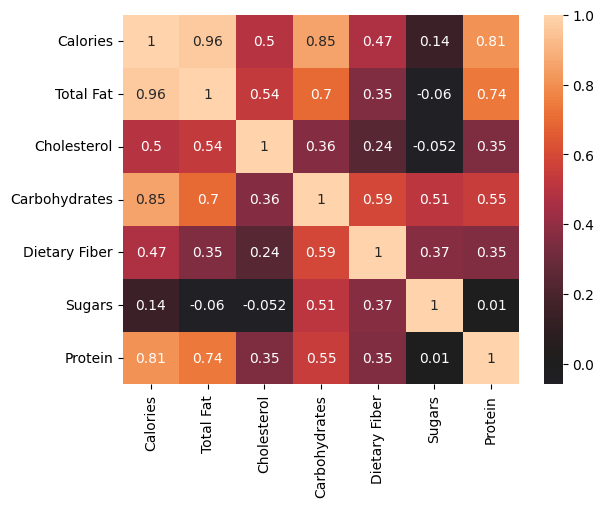

In [ ]:
sns.heatmap(
    foods[['Calories', 'Total Fat', 'Cholesterol', 'Carbohydrates','Dietary Fiber','Sugars','Protein']].corr(),
    annot=True,
    center=0,
);

Kalkulasi persentase kalori dari protein

In [ ]:
foods['Protein_Calories'] = foods['Protein'] * 4
foods['Protein_Calories_Percentage'] = (foods['Protein_Calories'] / foods['Calories']) * 100
foods['Protein_Calories_Percentage'] = foods['Protein_Calories_Percentage'].round(0)
foods['Protein_Calories_Percentage'] = foods['Protein_Calories_Percentage'].astype(int)

#Menganalisis data

Menurut  Kristi Wempen, R.D.N. (nutritionist), antara 10% hingga 35% kalori makanan harus berasal dari protein. (per item).

Dimana dibawah 10% proteinnya terlalu sedikit dan diatas 35% proteinnya sudah tidak efektif / tidak diperlukan oleh orang sehat.

In [ ]:
filtered_data = foods[(foods['Protein_Calories_Percentage'] >= 10) & (foods['Protein_Calories_Percentage'] <= 35)][['Category', 'Item', 'Calories', 'Protein', 'Protein_Calories_Percentage']]

filtered_data.sort_values(by=['Protein_Calories_Percentage'], ascending=False)

,Category,Item,Calories,Protein,Protein_Calories_Percentage
58,Chicken & Fish,Premium Grilled Chicken Classic Sandwich,350,28,32
62,Chicken & Fish,Premium Grilled Chicken Ranch BLT Sandwich,450,36,32
60,Chicken & Fish,Premium Grilled Chicken Club Sandwich,510,40,31
71,Chicken & Fish,Premium McWrap Chicken & Bacon (Grilled Chicken),480,36,30
1,Breakfast,Egg White Delight,250,18,29
...,...,...,...,...,...
31,Breakfast,Big Breakfast with Hotcakes (Regular Biscuit),1090,36,13
13,Breakfast,Sausage Biscuit with Egg (Large Biscuit),570,18,13
36,Breakfast,Hotcakes and Sausage,520,15,12
21,Breakfast,Sausage McGriddles,420,11,10


In [ ]:
filtered_data['Protein_Calories_Percentage'].describe()

count    82.000000
mean     19.451220
std       4.906917
min      10.000000
25%      16.000000
50%      19.000000
75%      21.750000
max      32.000000
Name: Protein_Calories_Percentage, dtype: float64

Ternyata ada 82 item makanan, dimana makanan tersebut sudah di dalam range yang diinginkan dan persentase paling tinggi adalah 32% dan rata - ratanya 19%.

In [ ]:
category_item_counts = filtered_data.groupby('Category')['Item'].count().reset_index()
category_item_counts.rename(columns={'Item': 'ItemCount'}, inplace=True)

category_item_counts

,Category,ItemCount
0,Beef & Pork,15
1,Breakfast,36
2,Chicken & Fish,27
3,Salads,4


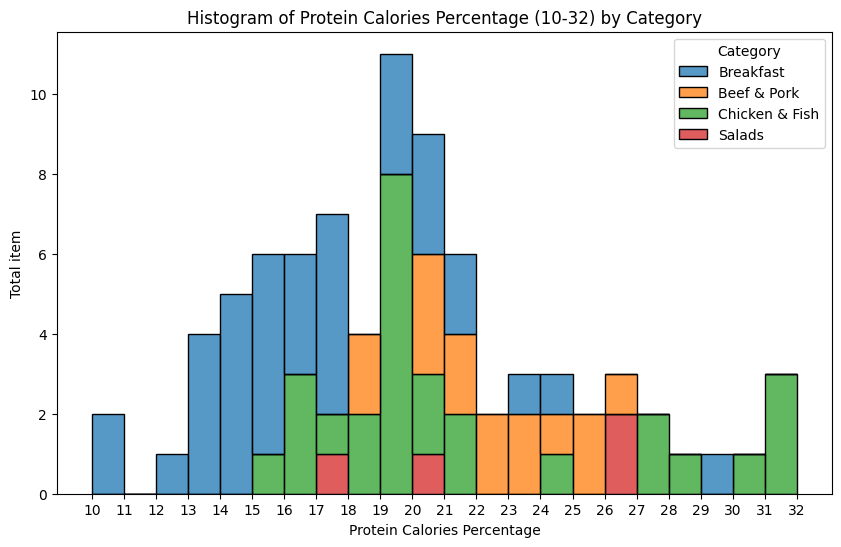

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=filtered_data, x="Protein_Calories_Percentage",hue="Category", multiple="stack", bins=range(10, 33))
plt.xlabel('Protein Calories Percentage')
plt.ylabel('Total item')
plt.title('Histogram of Protein Calories Percentage (10-32) by Category')
plt.xticks(range(10, 33))
plt.show()

Dari visualisasi ini dapat dilihat bahwa item dari category chicken & fish yang kandungan proteinnya paling optimal, tetapi lebih banyak item dari category breakfast yang kandungan proteinnya optimal.

Kita melihat item makanan yang paling optimal:

In [ ]:
filtered_data[filtered_data['Protein_Calories_Percentage'] == filtered_data['Protein_Calories_Percentage'].max()]

,Category,Item,Calories,Protein,Protein_Calories_Percentage
58,Chicken & Fish,Premium Grilled Chicken Classic Sandwich,350,28,32
62,Chicken & Fish,Premium Grilled Chicken Ranch BLT Sandwich,450,36,32


Lalu melihat item makanan yang paling tidak optimal:

In [ ]:
selected_columns = foods[['Category', 'Item', 'Calories', 'Protein', 'Protein_Calories_Percentage']]
selected_columns[selected_columns['Protein_Calories_Percentage'] == selected_columns['Protein_Calories_Percentage'].min()]

,Category,Item,Calories,Protein,Protein_Calories_Percentage
38,Breakfast,Hash Brown,150,1,3


Dapat disimpulkan item makanan yang paling optimal dengan melihat kalori makanan dari protein yaitu **Egg White Delight** dan paling tidak optimal adalah **Hash Brown**.

Berikut merupakan list ranking makanan teratas setiap kategori

In [ ]:
grouped = filtered_data.groupby('Category')

def top_n_items(group, n=3):
    return group.nlargest(n, 'Protein_Calories_Percentage')

top_3_items_per_category = grouped.apply(top_n_items)

top_3_items_per_category.reset_index(drop=True, inplace=True)

top_3_items_per_category

,Category,Item,Calories,Protein,Protein_Calories_Percentage
0,Beef & Pork,Double Quarter Pounder with Cheese,750,48,26
1,Beef & Pork,Quarter Pounder with Bacon & Cheese,600,37,25
2,Beef & Pork,Bacon McDouble,440,27,25
3,Breakfast,Egg White Delight,250,18,29
4,Breakfast,Steak & Egg McMuffin,430,26,24
5,Breakfast,Egg McMuffin,300,17,23
6,Chicken & Fish,Premium Grilled Chicken Classic Sandwich,350,28,32
7,Chicken & Fish,Premium Grilled Chicken Ranch BLT Sandwich,450,36,32
8,Chicken & Fish,Premium Grilled Chicken Club Sandwich,510,40,31
9,Salads,Premium Bacon Ranch Salad (without Chicken),140,9,26


Jumlah kalori dalam sehari yang dibutuhkan seseorang dewasa adalah
Laki - laki = 2200 - 3200 Kalori
Perempuan   = 1600 - 2400 Kalori

Melihat kombinasi makanan apa saja sesuai kategori untuk memenuhi kebutuhan kalori seseorang dalam sehari (Asumsi seseorang makan 4x sehari)

In [ ]:
calorie_limits = {
    "Men": (2200, 3200),
    "Women": (1600, 2400)
}

men_combinations = {}
women_combinations = {}

breakfast_items = filtered_data[filtered_data['Category'] == "Breakfast"]['Item'].tolist()
beef_pork_items = filtered_data[filtered_data['Category'] == "Beef & Pork"]['Item'].tolist()
chicken_fish_items = filtered_data[filtered_data['Category'] == "Chicken & Fish"]['Item'].tolist()

category_combinations = {
    "Breakfast": [],
    "Beef & Pork": [],
    "Chicken & Fish": [],
}

for category, category_items in zip(category_combinations.keys(), [breakfast_items, beef_pork_items, chicken_fish_items]):
    all_category_combinations = list(itertools.combinations(category_items, 4))

    for gender, (calorie_lower_limit, calorie_upper_limit) in calorie_limits.items():
        valid_combinations = []
        for combo in all_category_combinations:
            total_calories = filtered_data[filtered_data['Item'].isin(combo)]['Calories'].sum()
            if calorie_lower_limit <= total_calories <= calorie_upper_limit:
                valid_combinations.append(combo)

        if gender == "Men":
            men_combinations[category] = valid_combinations[:4]
        else:
            women_combinations[category] = valid_combinations[:4]

for category, category_combos in men_combinations.items():
    print("======================================")
    print(f"Combinations for {category} (Men):")
    for i, combo in enumerate(category_combos, 1):
        total_calories = filtered_data[filtered_data['Item'].isin(combo)]['Calories'].sum()
        print(f"Combination {i}:")
        print(f"Items: {' | '.join(combo)}")
        print(f"Total Calories: {total_calories} calories")
        print()

for category, category_combos in women_combinations.items():
    print("======================================")
    print(f"Combinations for {category} (Women):")
    for i, combo in enumerate(category_combos, 1):
        total_calories = filtered_data[filtered_data['Item'].isin(combo)]['Calories'].sum()
        print(f"Combination {i}:")
        print(f"Items: {' | '.join(combo)}")
        print(f"Total Calories: {total_calories} calories")
        print()


Combinations for Breakfast (Men):
Combination 1:
Items: Egg McMuffin | Egg White Delight | Bacon, Egg & Cheese Biscuit (Large Biscuit) | Big Breakfast with Hotcakes (Large Biscuit)
Total Calories: 2220 calories

Combination 2:
Items: Egg McMuffin | Egg White Delight | Sausage Biscuit with Egg (Regular Biscuit) | Big Breakfast with Hotcakes (Large Biscuit)
Total Calories: 2210 calories

Combination 3:
Items: Egg McMuffin | Egg White Delight | Sausage Biscuit with Egg (Large Biscuit) | Big Breakfast with Hotcakes (Regular Biscuit)
Total Calories: 2210 calories

Combination 4:
Items: Egg McMuffin | Egg White Delight | Sausage Biscuit with Egg (Large Biscuit) | Big Breakfast with Hotcakes (Large Biscuit)
Total Calories: 2270 calories

Combinations for Beef & Pork (Men):
Combination 1:
Items: Big Mac | Quarter Pounder with Cheese | Quarter Pounder with Bacon & Cheese | Quarter Pounder with Bacon Habanero Ranch
Total Calories: 2260 calories

Combination 2:
Items: Big Mac | Quarter Pounder wi

In [ ]:
calorie_limits = {
    "Boy": (1600, 2000),
    "Girl": (1400, 1600)
}

men_kid_combinations = {}
women_kid_combinations = {}

breakfast_items = filtered_data[filtered_data['Category'] == "Breakfast"]['Item'].tolist()
beef_pork_items = filtered_data[filtered_data['Category'] == "Beef & Pork"]['Item'].tolist()
chicken_fish_items = filtered_data[filtered_data['Category'] == "Chicken & Fish"]['Item'].tolist()

category_combinations = {
    "Breakfast": [],
    "Beef & Pork": [],
    "Chicken & Fish": [],
}

for category, category_items in zip(category_combinations.keys(), [breakfast_items, beef_pork_items, chicken_fish_items]):
    all_category_combinations = list(itertools.combinations(category_items, 4))

    for gender, (calorie_lower_limit, calorie_upper_limit) in calorie_limits.items():
        valid_combinations = []
        for combo in all_category_combinations:
            total_calories = filtered_data[filtered_data['Item'].isin(combo)]['Calories'].sum()
            if calorie_lower_limit <= total_calories <= calorie_upper_limit:
                valid_combinations.append(combo)

        if gender == "Boy":
            men_combinations[category] = valid_combinations[:4]
        else:
            women_combinations[category] = valid_combinations[:4]

for category, category_combos in men_combinations.items():
    print("======================================")
    print(f"Combinations for {category} (Boy):")
    for i, combo in enumerate(category_combos, 1):
        total_calories = filtered_data[filtered_data['Item'].isin(combo)]['Calories'].sum()
        print(f"Combination {i}:")
        print(f"Items: {' | '.join(combo)}")
        print(f"Total Calories: {total_calories} calories")
        print()

for category, category_combos in women_combinations.items():
    print("======================================")
    print(f"Combinations for {category} (Girl):")
    for i, combo in enumerate(category_combos, 1):
        total_calories = filtered_data[filtered_data['Item'].isin(combo)]['Calories'].sum()
        print(f"Combination {i}:")
        print(f"Items: {' | '.join(combo)}")
        print(f"Total Calories: {total_calories} calories")
        print()


Combinations for Breakfast (Boy):
Combination 1:
Items: Egg McMuffin | Egg White Delight | Sausage McMuffin | Big Breakfast (Regular Biscuit)
Total Calories: 1660 calories

Combination 2:
Items: Egg McMuffin | Egg White Delight | Sausage McMuffin | Big Breakfast (Large Biscuit)
Total Calories: 1720 calories

Combination 3:
Items: Egg McMuffin | Egg White Delight | Sausage McMuffin | Big Breakfast with Egg Whites (Large Biscuit)
Total Calories: 1610 calories

Combination 4:
Items: Egg McMuffin | Egg White Delight | Sausage McMuffin | Big Breakfast with Hotcakes and Egg Whites (Regular Biscuit)
Total Calories: 1910 calories

Combinations for Beef & Pork (Boy):
Combination 1:
Items: Big Mac | Quarter Pounder with Cheese | Quarter Pounder with Bacon & Cheese | Hamburger
Total Calories: 1890 calories

Combination 2:
Items: Big Mac | Quarter Pounder with Cheese | Quarter Pounder with Bacon & Cheese | Cheeseburger
Total Calories: 1940 calories

Combination 3:
Items: Big Mac | Quarter Pounder 